# Lab 2: More 311 Data exploration

In HW1, we did some basic data exploration and visualization. In this lab, we will continue digging through the 311 datasets for more data wrangling practice.

## Git and Github

Before we get started, let's get set up with git and github on our computers
https://github.com/dssg/hitchhikers-guide/tree/master/curriculum/git-and-github/basic_git_tutorial is a good tutorial that you should go through if you're not comfortable with git and github.
Make sure you set up an ssh key and add it to your github account to make it easy to push changes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download and Load datasets
graffiti = pd.read_csv('311_Service_Requests_-_Graffiti_Removal.csv', index_col = 'Service Request Number')
graffiti.columns

Index(['Creation Date', 'Status', 'Completion Date', 'Type of Service Request',
       'What Type of Surface is the Graffiti on?',
       'Where is the Graffiti located?', 'Street Address', 'ZIP Code',
       'X Coordinate', 'Y Coordinate', 'Ward', 'Police District',
       'Community Area', 'SSA', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [3]:
buildings = pd.read_csv('311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')
buildings.columns

Index(['SERVICE REQUEST TYPE', 'DATE SERVICE REQUEST WAS RECEIVED',
       'LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).',
       'IS THE BUILDING DANGEROUS OR HAZARDOUS?',
       'IS BUILDING OPEN OR BOARDED?',
       'IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?',
       'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?',
       'IS THE BUILDING VACANT DUE TO FIRE?',
       'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)',
       'ADDRESS STREET NUMBER', 'ADDRESS STREET DIRECTION',
       'ADDRESS STREET NAME', 'ADDRESS STREET SUFFIX', 'ZIP CODE',
       'X COORDINATE', 'Y COORDINATE', 'Ward', 'Police District',
       'Community Area', 'LATITUDE', 'LONGITUDE', 'Location'],
      dtype='object')

In [4]:
potholes = pd.read_csv('311_Service_Requests_-_Pot_Holes_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')
potholes.columns

Index(['CREATION DATE', 'STATUS', 'COMPLETION DATE', 'TYPE OF SERVICE REQUEST',
       'CURRENT ACTIVITY', 'MOST RECENT ACTION',
       'NUMBER OF POTHOLES FILLED ON BLOCK', 'STREET ADDRESS', 'ZIP',
       'X COORDINATE', 'Y COORDINATE', 'Ward', 'Police District',
       'Community Area', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [5]:
sanitation = pd.read_csv('311_Service_Requests_-_Sanitation_Code_Complaints.csv', index_col = 'Service Request Number')
sanitation.columns

Index(['Creation Date', 'Status', 'Completion Date', 'Type of Service Request',
       'What is the Nature of this Code Violation?', 'Street Address',
       'ZIP Code', 'X Coordinate', 'Y Coordinate', 'Ward', 'Police District',
       'Community Area', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

## Spatiotemporal data

A lot of policy problems involve data related to some location (house, business, block, zipcode, city, etc.) at some time. It is useful to know how to do analysis on spatiotemporal data. The analysis below will help you get more comfortable with analyzing data with spatial and temporal components

### Completion Times
A natural thing to ask about 311 requests is how long does it take 311 requests to be completed? Do response times vary much between the different 311 request types? Plot the distribution of response times by each request type.

(array([  1.20386000e+05,   7.10000000e+01,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

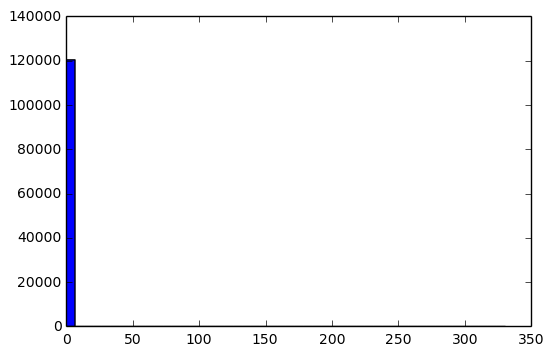

In [6]:
import numpy as np
graffiti['Completion Date'] = pd.to_datetime(graffiti['Completion Date'], format='%m/%d/%Y')
graffiti['Creation Date'] = pd.to_datetime(graffiti['Creation Date'], format='%m/%d/%Y')
graffiti['response_time'] = graffiti['Completion Date'] - graffiti['Creation Date']
graffiti['response_time'] = (graffiti['response_time'] / np.timedelta64(1, 'D')).astype(int)

plt.hist(graffiti['response_time'].dropna(), bins=50)

(array([  2.29230000e+04,   6.55800000e+03,   3.77900000e+03,
          2.44400000e+03,   1.85700000e+03,   1.71300000e+03,
          1.20300000e+03,   1.35300000e+03,   1.09500000e+03,
          9.93000000e+02,   8.44000000e+02,   6.74000000e+02,
          5.53000000e+02,   6.74000000e+02,   4.73000000e+02,
          3.93000000e+02,   3.17000000e+02,   2.30000000e+02,
          2.03000000e+02,   1.73000000e+02,   1.20000000e+02,
          1.24000000e+02,   1.42000000e+02,   1.16000000e+02,
          5.00000000e+01,   7.40000000e+01,   6.10000000e+01,
          5.70000000e+01,   6.50000000e+01,   6.70000000e+01,
          5.10000000e+01,   3.40000000e+01,   4.30000000e+01,
          2.50000000e+01,   1.10000000e+01,   1.40000000e+01,
          3.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   1.00000000e+00,
        

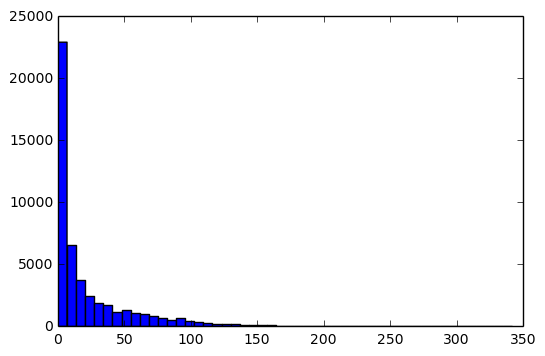

In [7]:
potholes['COMPLETION DATE'] = pd.to_datetime(potholes['COMPLETION DATE'], format='%m/%d/%Y')
potholes['CREATION DATE'] = pd.to_datetime(potholes['CREATION DATE'], format='%m/%d/%Y')
potholes['response_time'] = potholes['COMPLETION DATE'] - potholes['CREATION DATE']
potholes['response_time'] = (potholes['response_time'] / np.timedelta64(1, 'D')).astype(float)

plt.hist(potholes['response_time'].dropna(), bins=50)

(array([  9.53700000e+03,   4.08700000e+03,   1.61400000e+03,
          1.50900000e+03,   1.15300000e+03,   7.19000000e+02,
          6.91000000e+02,   5.80000000e+02,   1.99000000e+02,
          2.61000000e+02,   1.75000000e+02,   1.03000000e+02,
          9.30000000e+01,   6.90000000e+01,   2.60000000e+01,
          2.70000000e+01,   2.60000000e+01,   8.00000000e+00,
          1.10000000e+01,   1.20000000e+01,   7.00000000e+00,
          1.30000000e+01,   7.00000000e+00,   6.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          1.20000000e+01,   1.60000000e+01,   5.00000000e+00,
          1.30000000e+01,   7.00000000e+00,   8.00000000e+00,
          1.10000000e+01,   1.40000000e+01,   3.00000000e+00,
          6.00000000e+00,   1.20000000e+01,   8.00000000e+00,
          1.40000000e+01,   7.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   1.00000000e+00,
        

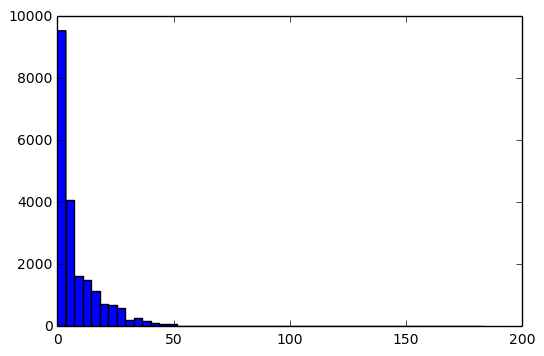

In [8]:
sanitation['Completion Date'] = pd.to_datetime(sanitation['Completion Date'], format='%m/%d/%Y')
sanitation['Creation Date'] = pd.to_datetime(sanitation['Creation Date'], format='%m/%d/%Y')
sanitation['response_time'] = sanitation['Completion Date'] - sanitation['Creation Date']
sanitation['response_time'] = (sanitation['response_time'] / np.timedelta64(1, 'D')).astype(float)

plt.hist(sanitation['response_time'].dropna(), bins=50)

Do you see any signs of errors or noise in the data? 

### Adding Time based features
Extract the hour of day, day of week, month of year from the 311 request dates. The pandas to_datetime function may be helpful for this.
Do the 311 request frequencies look the same by day of week/month of year? Do 311 requests filed on weekends take longer to complete than those filed on weekdays? Perform the same analysis for each different request type as well.
Report any interesting/surprising findings.

array([[<matplotlib.axes.AxesSubplot object at 0x7fba32aa2198>,
        <matplotlib.axes.AxesSubplot object at 0x7fba328bbc88>]], dtype=object)

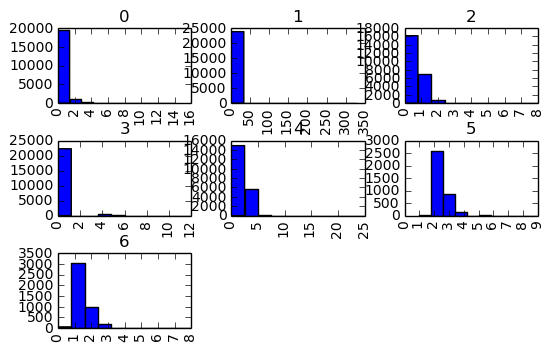

In [31]:
# frequency histograms by day of week
graffiti['Creation Date'] = pd.to_datetime(graffiti['Creation Date'])
graffiti['Receipt date weekday'] = graffiti['Creation Date'].dt.weekday
graffiti['response_time'].hist(by=graffiti['Receipt date weekday'])

In [42]:
# frequency counts by day of week
g_freq_ct_weekday = graffiti['Receipt date weekday'].value_counts().sort_index()
g_freq_ct_weekday

0    20570
1    23825
2    24262
3    23017
4    20864
5     3626
6     4297
Name: Receipt date weekday, dtype: int64

In [43]:
# average response time by day of week
g_avg_response_time_weekday = pd.pivot_table(graffiti, values='response_time', index=['Receipt date weekday'], aggfunc=np.mean).sort_index()
g_avg_response_time_weekday

Receipt date weekday
0    0.508751
1    0.449234
2    0.392795
3    0.412434
4    0.934768
5    2.342802
6    1.334885
Name: response_time, dtype: float64

In [44]:
# Summary by day of week
g_weekday = pd.concat([g_freq_ct_weekday,g_avg_response_time_weekday], axis=1)
g_weekday.columns = ['count of requests', 'avg response time']
g_weekday

,count of requests,avg response time
Receipt date weekday,,
0,20570,0.508751
1,23825,0.449234
2,24262,0.392795
3,23017,0.412434
4,20864,0.934768
5,3626,2.342802
6,4297,1.334885


Observations by weekday:  
Fewer requests come in on the weekends.  
Average response time is much higher on weekends (Friday through Sunday), as expected. Average response time is fastest on Wednesdays and Thursdays.

In [46]:
# frequency counts by month
graffiti['Receipt month'] = graffiti['Creation Date'].dt.month
g_freq_ct_month = graffiti['Receipt month'].value_counts().sort_index()
g_freq_ct_month

1      9446
2     10184
3     10572
4     10711
5     10982
6     10349
7      9591
8     11863
9      9312
10     9580
11     9743
12     8128
Name: Receipt month, dtype: int64

In [47]:
# average response time by month
g_avg_response_time_month = pd.pivot_table(graffiti, values='response_time', index=['Receipt month'], aggfunc=np.mean).sort_index()
g_avg_response_time_month

Receipt month
1     0.462100
2     0.510801
3     0.651816
4     0.599384
5     0.593608
6     0.640738
7     0.830883
8     0.585855
9     0.735610
10    0.671921
11    0.549625
12    0.533465
Name: response_time, dtype: float64

In [48]:
# Summary by month
g_month = pd.concat([g_freq_ct_month,g_avg_response_time_month], axis=1)
g_month.columns = ['count of requests', 'avg response time']
g_month

,count of requests,avg response time
Receipt month,,
1,9446,0.462100
2,10184,0.510801
3,10572,0.651816
4,10711,0.599384
5,10982,0.593608
6,10349,0.640738
7,9591,0.830883
8,11863,0.585855
9,9312,0.735610


Observations by month:   
Fewer requests come in during fall and winter months.  

### Time functions in pandas and pys thon

You'll be manipulating dates quite a bit in python so you should be comfortable with turning date strings into datetime data types and then manipulating the dates. Some functions to explore are:

* 

### Visualizing 311 request hotspots
In HW1 we learned a bit about where 311 requests occurred most frequently. Let's get a better sense of this using a visualization of 311 requests by location. We'll need to download Chicago zipcode boundaries from https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-ZIP-Codes/gdcf-axmw
and the geopandas library. If you don't already have geopandas installed, install it via:

In [2]:
# if you're on your own machine
sudo pip3 install geopandas

# if you're on a CSIL machine
pip3 install --user geopandas

SyntaxError: invalid syntax (<ipython-input-2-930f8167ec11>, line 2)

Here is a quick demo of the geopandas plotting which should help you get started with plotting Chicago zipcode areas:

In [ ]:
import geopandas as gpd
fname = 'Boundaries - ZIP Codes.geojson'
chicago = gpd.read_file(fname)
chicago.head()

In [ ]:
# plot a heatmap based on the zipcode size
chicago.plot(column='shape_area', colormap='OrRd')

Aggregate the 311 requests by zipcode and visualize request frequency, average request completion time by location, and any other things you find interesting. Do the same for some of the demograpic data(IE: median household income by zipcode, etc). Report any other interesting/surprising findings.

### Potentially helpful links
http://pandas.pydata.org/pandas-docs/stable/timeseries.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

http://geopandas.org/mapping.html

http://geopandas.org/mergingdata.html